In [1]:
import ase
from readts import TSFile
import matplotlib.pyplot as plt
import ase.io.castep as castep

import ase
import ase.calculators.castep
import ase.io.castep
from ase.io import write
import numpy as np
calc = ase.calculators.castep.Castep()
calc._prepare_input_only = True

[111, 109, 321, 319, 127, 125, 74, 371, 369, 133, 131, 265, 263, 296, 294, 381, 153, 151, 463, 461, 288, 286, 435, 433, 332, 330, 151, 149, 367, 365, 330, 328, 119, 117, 423, 421]
[ 74 109 111 117 119 125 127 131 133 149 151 153 263 265 286 288 294 296
 319 321 328 330 332 365 367 369 371 381 421 423 433 435 461 463]
74 20
-4
-265050.4010235229 -265051.22716120933 -265051.2222631598 0.8261376864393242
-3
-265050.4015677506 -265051.22716120933 -265051.2222631598 0.8255934587214142
-2
-265050.4023840922 -265051.22716120933 -265051.2222631598 0.8247771171154454
-1
-265050.3784380723 -265051.22716120933 -265051.2222631598 0.8487231370527297
109 20
-4
-271385.84658323 -271386.2808769545 -271385.9127068986 0.4342937244800851
-3
-271385.84712745773 -271386.2808769545 -271385.9127068986 0.4337494967621751
-2
-271385.8476716855 -271386.2808769545 -271385.9127068986 0.4332052689860575
-1
-271385.8476716855 -271386.2808769545 -271385.9127068986 0.4332052689860575
111 20
-4
-271385.78644606646 -27

<ipython-input-28-e906d78385af>:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


328 39
-4
-259998.51138287567 -259998.80472161935 -259999.0264944173 0.2933387436787598
-3
-259998.65043305937 -259998.80472161935 -259999.0264944173 0.15428855997743085
-2
-259998.69560396054 -259998.80472161935 -259999.0264944173 0.1091176588088274
-1
-259998.72308746065 -259998.80472161935 -259999.0264944173 0.08163415870512836
330 39
-4
-275166.1718185083 -275166.44937464804 -275166.77046900574 0.27755613974295557
-3
-275166.17453964695 -275166.44937464804 -275166.77046900574 0.2748350010951981
-2
-275166.17453964695 -275166.44937464804 -275166.77046900574 0.2748350010951981
-1
-275166.17453964695 -275166.44937464804 -275166.77046900574 0.2748350010951981
332 39
-4
-259998.71084233685 -259998.80472161935 -259999.03710685793 0.09387928250362165
-3
-259998.72689705473 -259998.80472161935 -259999.03710685793 0.07782456462155096
-2
-259998.75655746573 -259998.80472161935 -259999.03710685793 0.04816415361710824
-1
-259998.77397275294 -259998.80472161935 -259999.03710685793 0.03074886641

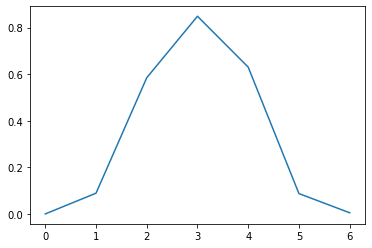

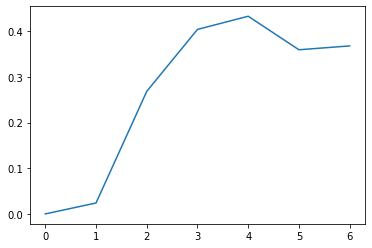

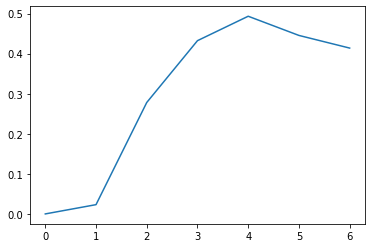

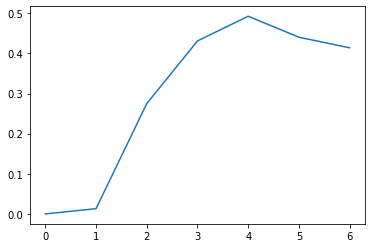

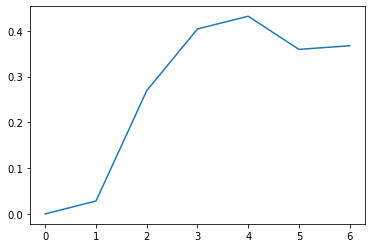

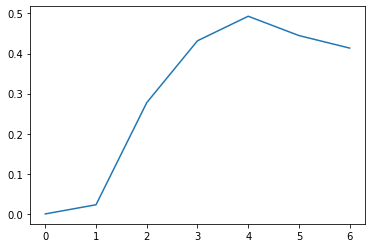

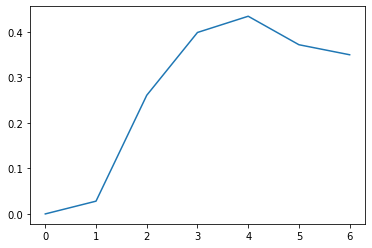

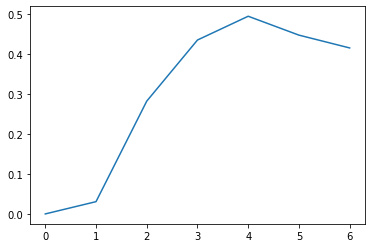

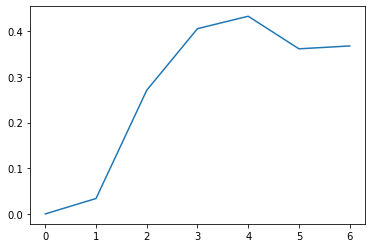

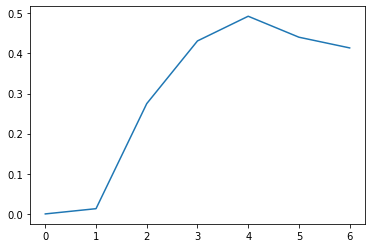

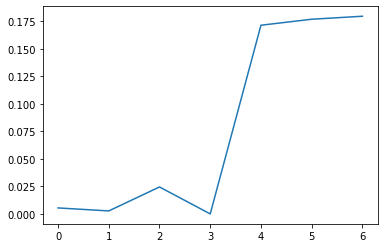

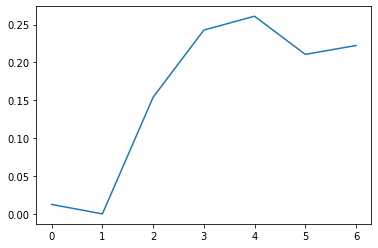

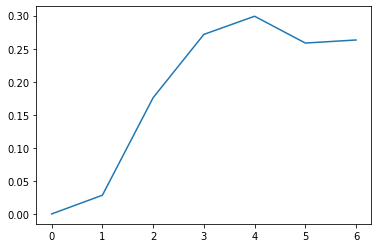

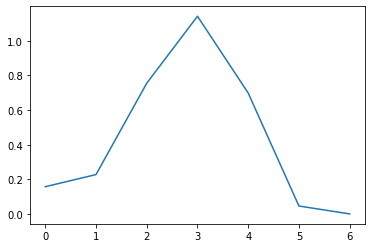

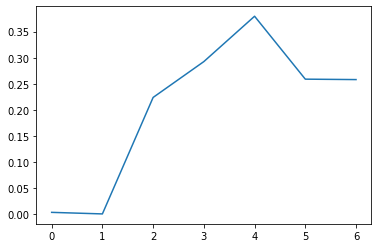

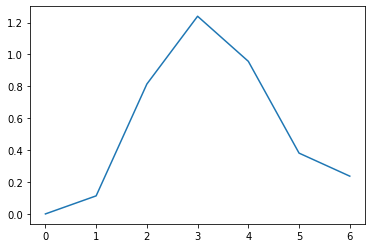

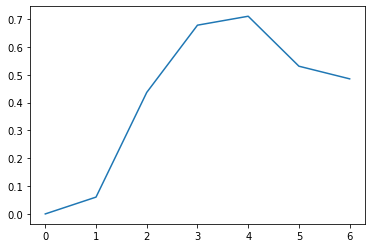

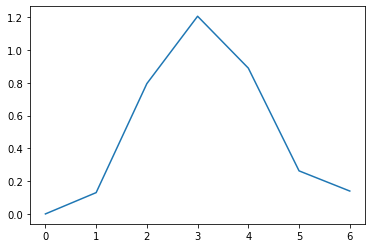

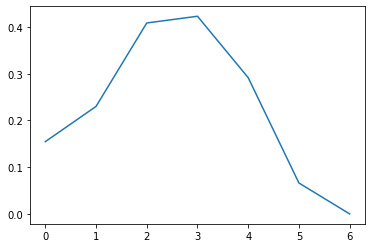

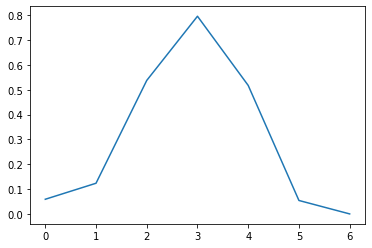

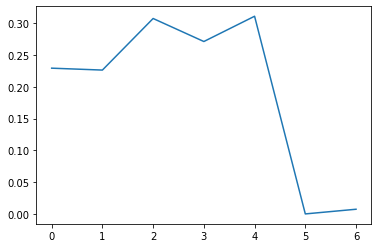

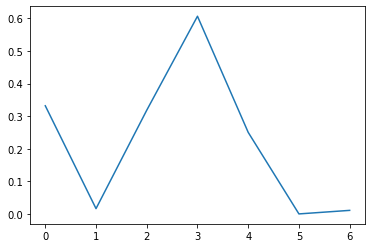

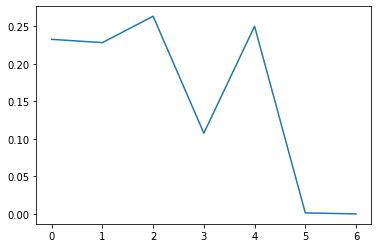

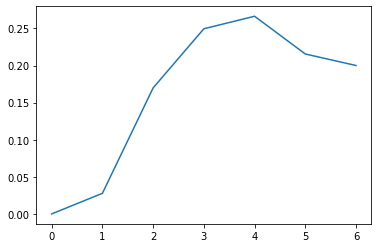

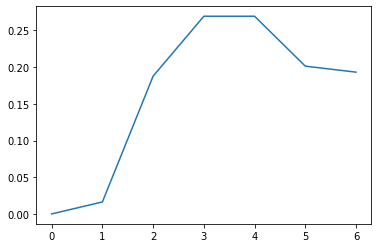

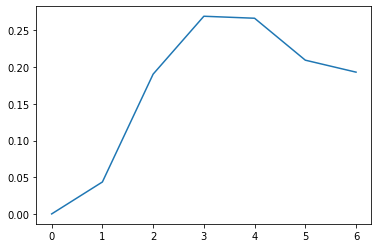

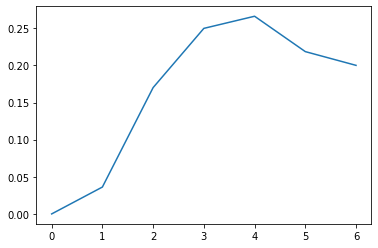

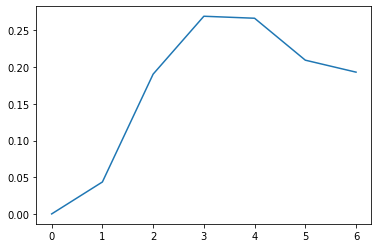

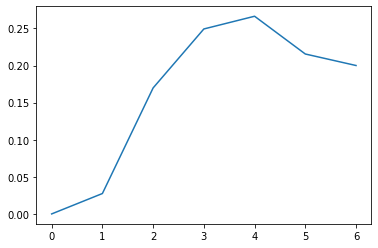

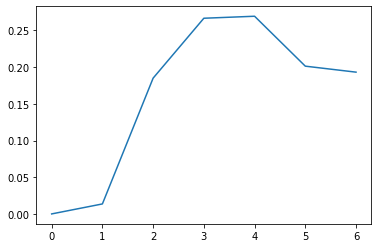

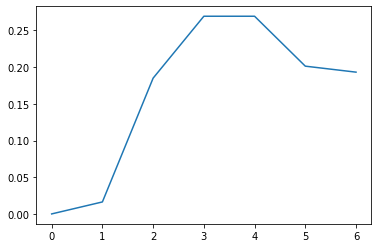

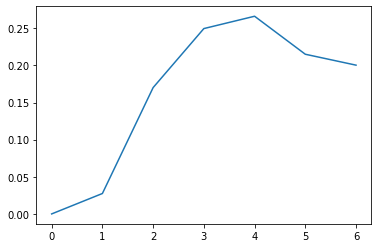

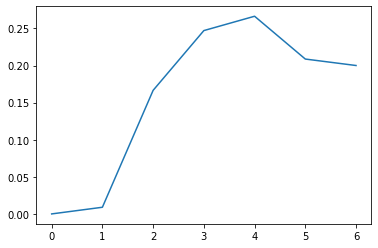

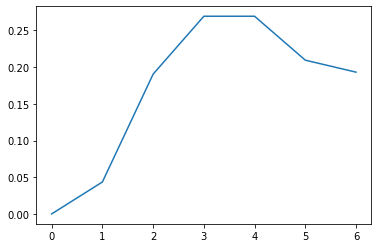

<Figure size 432x288 with 0 Axes>

In [28]:
barriers = [109,111,117,119,125,127,131,133,149,151,153,263,265,286,288,294,296,319,321,328,330,332,369,371]
barrier = []
for i in barriers:
    ts2 = TSFile('neb', path='../barrier{}'.format(i))

    block = ts2.blocks['TST']
    react = ts2.blocks['REA'][1][0]
    prod = ts2.blocks['PRO'][1][0]
    #print(react)
    #step , reactStruct = ts2.blocks['REA']
    #print(react)
    print(i,len(block.get_steps()))
    for k in range(-4,0):
        print(k)
        j = k%len(block.get_steps())
        looper = block[j][:]
        
        #print(looper)
        #print('Step: {0}'.format(step))    # The number of the step
        Energies = []
        Energies.append(react.atoms.get_potential_energy())
        Energies.extend([m.atoms.get_potential_energy() for m in looper])
        Energies.append(prod.atoms.get_potential_energy())
        saddle = np.max(Energies)
        Energies = Energies - np.min(Energies)
        b = saddle-react.atoms.get_potential_energy()
        print(saddle,react.atoms.get_potential_energy(),prod.atoms.get_potential_energy(),b)

    plt.plot(Energies)
    plt.figure()
    barrier.append(b)


np.save("barriers.npy",barrier)

[0.         0.04353822 0.1904797  0.26939272 0.26939272 0.20952767
 0.19320084]
-275167.48068618675


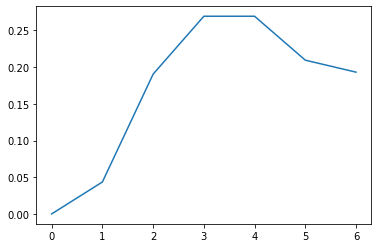

In [29]:
np.save('barrier.npy',barrier)
plt.plot(Energies)
print(Energies)
print(react.atoms.get_potential_energy())